### Figure 3

In [1]:
%run IMP.ipynb

#### Input Data

In [2]:
YEAR = [2041,2050]
ny = 1991-2100
TY_TRANS_RHO_Sum_cntl  = xr.open_dataset('TY_TRANS_RHO_Sum_CTRL.nc').TY_TRANS_RHO_Sum.sel(year=slice(YEAR[0]-ny,YEAR[1]-ny)).mean('year')
TY_TRANS_RHO_Sum_wthp  = xr.open_dataset('TY_TRANS_RHO_Sum_WT.nc').TY_TRANS_RHO_Sum.sel(year=slice(YEAR[0]-ny,YEAR[1]-ny)).mean('year')
TY_TRANS_RHO_Sum_wthmp = xr.open_dataset('TY_TRANS_RHO_Sum_WTM.nc').TY_TRANS_RHO_Sum.sel(year=slice(YEAR[0]-ny,YEAR[1]-ny)).mean('year')

moc_rho_cntl  = calc_psi(TY_TRANS_RHO_Sum_cntl)
moc_rho_wthp  = calc_psi(TY_TRANS_RHO_Sum_wthp)
moc_rho_wthmp = calc_psi(TY_TRANS_RHO_Sum_wthmp)

moc_rho_anom_wthmp = moc_rho_wthmp - moc_rho_cntl
moc_rho_anom_mp    = moc_rho_wthmp - moc_rho_wthp

lat = TY_TRANS_RHO_Sum_cntl.lat

In [3]:
aabw_control = xr.open_dataset('AABW_Index_CTRL.nc').AABW.sel(year=slice(2100,2159))
aabw_wthp    = xr.open_dataset('AABW_Index_WT.nc').AABW.sel(year=slice(2100,2159))
aabw_wthmp   = xr.open_dataset('AABW_Index_WTM.nc').AABW.sel(year=slice(2110,2159))

amoc_control = xr.open_dataset('AMOC_Index_CTRL.nc').AMOC_Index.sel(year=slice(2100,2159))
amoc_wthp    = xr.open_dataset('AMOC_Index_WT.nc').AMOC_Index.sel(year=slice(2100,2159))
amoc_wthmp   = xr.open_dataset('AMOC_Index_WTM.nc').AMOC_Index.sel(year=slice(2110,2159))

aabw_long = np.append(aabw_spinup,aabw_control,axis=0)
amoc_long = np.append(amoc_spinup,amoc_control,axis=0)
year_long = np.append(aabw_spinup.year,aabw_control.year,axis=0)

year_wthp  = aabw_wthp.year
year_wthmp = aabw_wthmp.year

#### Plot

In [4]:
titles = ['AABW Transport','AMOC Strength','CTRL','Wind+Thermal+Meltwater','Meltwater Component']
title_aabw = '42% AABW decline by 2050'
title_amoc = '19% AMOC decline by 2050'

legends = ['[SPINUP$+$CTRL]','[W$+$T]','[W$+$T$+$M]']
colors  = ['grey','black','orangered','royalblue']

color_aabw = colors[2]
color_amoc = colors[3]

LEGEND_aabw = 'AABW '
LEGEND_amoc = 'AMOC '

fs_0,fs_1,fs_2,fs_3,fs_4,fs_5 = 13,12.5,11.5,11,10,9
lw,lw_1 = 1.5,0.6
hs = 8

yt,xt = 0.99,0.01

In [5]:
XX = [1940-ny,year_long[-1]]
XS_aabw = ['' for i in range(XX[0]+ny,(1990),10)]+[str(i) for i in range((1990),XX[1]+ny+1,10)]
XS_amoc = ['' for i in range(XX[0]+ny,(1990),10)]+[str(i) for i in range((1990),XX[1]+ny+1,10)]
XS_aabw[3] = 'SPINUP'
XS_amoc[2] = 'SPINUP'

xc = 2
XS_1991 = ['' for i in range(XX[0]+ny-xc,XX[1]+ny+1+xc,1)]
XS_1991[1991-(1940-xc)] = '1991   '

YY_aabw = [12,12+14,12]
YY_amoc = [8,8+14,8]

In [6]:
levs_mean = np.arange(-24.,24.01,3)
tics_mean = np.arange(-24.,24.01,6)
levs_anom = np.arange(-4.,4.01,0.5)
tics_anom = np.arange(-4.,4.01,1.0)

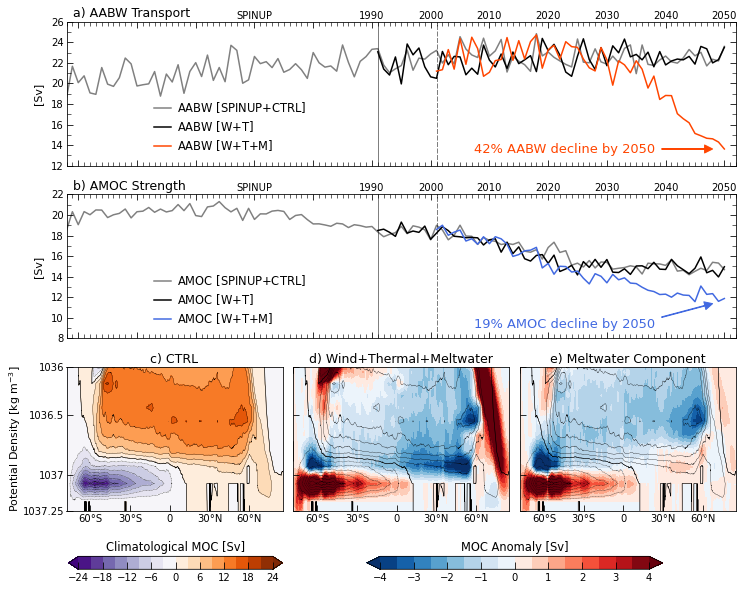

In [7]:
''''''
nrow,ncol = 3,3
''''''
fig = plt.figure(1,figsize=(ncol*4,ncol*3))
gs = gridspec.GridSpec(nrow,ncol,height_ratios=np.ones((nrow)),width_ratios=np.ones((ncol)))
gs.update(hspace=0.2,wspace=0.05)
###
ax00 = fig.add_subplot(gs[0,:])
make_subplot_A(ax00)
###
ax11 = fig.add_subplot(gs[1,:])
make_subplot_B(ax11)
###
ax20 = fig.add_subplot(gs[2,0])
p1 = plot_moc_rho(moc_rho_cntl,moc_rho_cntl,levs_mean,levs_mean,colormap_mean)
plt.ylim(yl1,yl2)
ax21 = fig.add_subplot(gs[2,1])
p2 = plot_moc_rho(moc_rho_anom_wthmp,moc_rho_cntl,levs_anom,levs_mean,colormap_anom)
plt.ylim(yl1,yl2)
ax22 = fig.add_subplot(gs[2,2])
p3 = plot_moc_rho(moc_rho_anom_mp,moc_rho_cntl,levs_anom,levs_mean,colormap_anom)
plt.ylim(yl1,yl2)
######
ax00.set_title(labels[0]+' '+titles[0],loc='left'  ,fontsize=fs_1,y=yt,x=xt)
ax11.set_title(labels[1]+' '+titles[1],loc='left'  ,fontsize=fs_1,y=yt,x=xt)
ax20.set_title(labels[2]+' '+titles[2],loc='center',fontsize=fs_1,y=yt)
ax21.set_title(labels[3]+' '+titles[3],loc='center',fontsize=fs_1,y=yt)
ax22.set_title(labels[4]+' '+titles[4],loc='center',fontsize=fs_1,y=yt)              
######
ax21.set_yticklabels([])
ax22.set_yticklabels([])
ax21.set_ylabel('')
ax22.set_ylabel('')

# Plot a colorbar
cax1 = plt.axes([0.1275,0.035,0.2475,0.02])
cax2 = plt.axes([0.4725,0.035,0.3425,0.02])
cb1 = plt.colorbar(p1,cax=cax1,orientation='horizontal',ticks=tics_mean)
cb2 = plt.colorbar(p2,cax=cax2,orientation='horizontal',ticks=tics_anom)
cb1.ax.tick_params(axis='x',direction='in',length=7,labelsize=fs_4)
cb2.ax.tick_params(axis='x',direction='in',length=7,labelsize=fs_4)
cb1.ax.set_xlabel('Climatological MOC [Sv]',fontsize=fs_2,labelpad=5)
cb2.ax.set_xlabel('MOC Anomaly [Sv]'       ,fontsize=fs_2,labelpad=5)
cax1.xaxis.set_label_position('top')
cax2.xaxis.set_label_position('top')